In [40]:
import numpy as np
import math as mt
import random
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import random
import seaborn as sns
from matplotlib.colors import BoundaryNorm, ListedColormap

# The Eight Queens Problem (Solved)

Problem: Arrange eight queens on a standard 64-square chessboard such that none of the pieces threaten each other.

---

Solution:
I have implemented a brute-force algorithm that samples a partially random arrangement of queens and checks if the arrangement is a solution or not. It returns the arrangement if it is a valid solution, and if not the algorithm generates a new arrangement of queens.

There are ${64 \choose 8} = 4426165368$ possible arrangements of eight queens on a standard chessboard. However, we can reduce the number of valid arrangements by observing that in every solution, each row/column has exactly one queen. Thus we can reduce the number of possible arrangements to $8!\ = 40320$ which is much more computationally manageable. 

The following algorithm generates a random arrangement of queens such that each row and column only has one queen, and checks if said arrangement is a valid solution by inspecting all positions threatened by each queen.

In [41]:
### Defining the requisite functions
  
#Checks if a queen at position qpos is threatened by any other queen from a list of positions qpos_rest
def threat(qpos, qpos_rest):
  for pos in qpos_rest:
    for j in range(8):
      if [j, pos[1]] == qpos or [pos[0], j] == qpos: #Checking for vertical and horizontal threats
        return True 
      elif abs(pos[0] - qpos[0]) == abs(pos[1] - qpos[1]): #Checking for diagonal threats
        return True
      #elif qpos in diagonal(pos):  #Checking for diagonal threats
        #return True
  return False

#Generates a random arrangement of queens such that no two queens share the same row and column
def generate_queens():
  qcoords = []
  ycoords = random.sample(range(8), 8)
  for i in range(8):
      qcoords.append([i, ycoords[i]])
  return qcoords

#Generates empty checkerboard
def make_board(n):
    final = []
    for i in range(n):
        final.append(list(np.tile([0,1],int(n/2))) if i%2==0 else list(np.tile([1,0],int(n/2))))
    return np.array(final)

#Algorithm for validating arrangement generated by above function
def eight_queens():
  count = 1 #For while loop
  result = 0 #For checking validity of solution - counts number of queens in arrangement that are not threatened by any other queen
  while count > 0:
      result = 0
      qcoords = generate_queens()

      for q in range(8):
        qpos = qcoords[q]
        qpos_rest = qcoords[0:q] + qcoords[q+1:]
        if threat(qpos, qpos_rest) == False:
          result += 1

      if result == 8:
        count = 0
      else:
        #print("Permutations searched: ", count) #Optional counter of incorrect arrangements before obtaining valid solution
        count += 1
  chessboard = make_board(8)
  for pos in qcoords:
    chessboard[pos[0], pos[1]] = 2
  return chessboard

#Generates heatmap of the solution using seaborn
def visualise(solution):
  fig, ax = plt.subplots()
  fig.set_size_inches(18.5, 10.5)
  my_colors = ['black', 'white', 'red']
  my_cmap = ListedColormap(my_colors)
  ax = sns.heatmap(solution, linewidths=0, cbar = False, square = True, vmin=0, vmax=2, cmap = my_colors, xticklabels=np.arange(1, 9), yticklabels=np.arange(1, 9))
  ax.set_title('A solution to the Eight Queens Problem (red tiles represent queen positions)')
  ax.title.set_size(20)

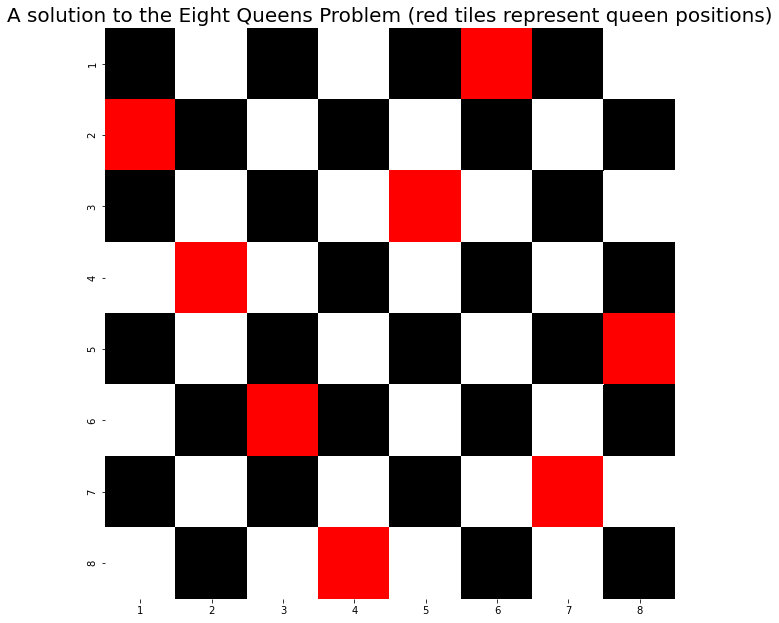

In [42]:
solution = eight_queens()
visualise(solution)

In [47]:
### N queens problem - extending the above algorithm to an arbitrary number of queens on an arbitrarily sized chessboard

### Defining the requisite functions
  
#Checks if a queen at position qpos is threatened by any other queen from a list of positions qpos_rest
def threat(qpos, qpos_rest, n):
  for pos in qpos_rest:
    for j in range(n):
      if [j, pos[1]] == qpos or [pos[0], j] == qpos: #Checking for vertical and horizontal threats
        return True 
      elif abs(pos[0] - qpos[0]) == abs(pos[1] - qpos[1]): #Checking for diagonal threats
        return True
  return False

#Generates a random arrangement of queens such that no two queens share the same row and column
def generate_queens(n):
  qcoords = []
  ycoords = random.sample(range(n), n)
  for i in range(n):
      qcoords.append([i, ycoords[i]])
  return qcoords

#Algorithm for validating arrangement generated by above function
def n_queens(n):
  count = 1 #For while loop
  result = 0 #For checking validity of solution - counts number of queens in arrangement that are not threatened by any other queen
  while count > 0:
      result = 0
      qcoords = generate_queens(n)

      for q in range(n):
        qpos = qcoords[q]
        qpos_rest = qcoords[0:q] + qcoords[q+1:]
        if threat(qpos, qpos_rest, n) == False:
          result += 1

      if result == n:
        count = 0
      else:
        #print("Permutations searched: ", count) #Optional counter of incorrect arrangements before obtaining valid solution
        count += 1
  chessboard = np.zeros((n, n))
  for pos in qcoords:
    chessboard[pos[0], pos[1]] = 1
  #chessboard = chessboard.astype(np.float)
  return chessboard

#Generates heatmap of the solution using seaborn
def visualise(solution):
  n = len(solution[1])
  fig, ax = plt.subplots()
  fig.set_size_inches(18.5, 10.5)
  ax = sns.heatmap(solution, linewidths=.5, cbar = False, square = True, vmin=0, vmax=1, cmap = "Dark2", xticklabels=np.arange(1, n+1), yticklabels=np.arange(1, n+1))
  ax.set_title('A solution to the %d Queens Problem (grey tiles represent queen positions)'%n)
  ax.title.set_size(20)

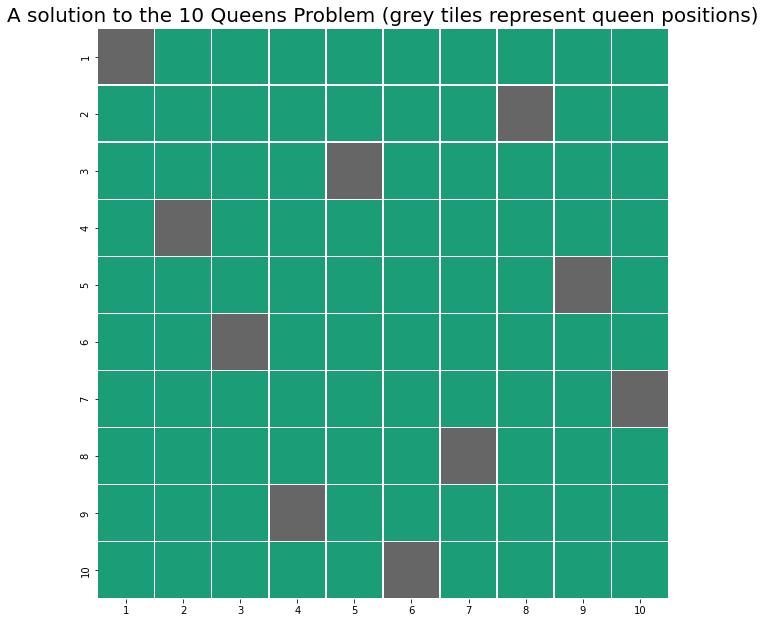

In [48]:
n = 10
solution = n_queens(n)
visualise(solution)